# 🏁 Kart Lap Times Analysis

## 📘 Project Summary

This notebook is part of the **Kart Lap Times Analysis** project — a data analytics case study focused on understanding patterns and performance in go-kart racing lap times.

The dataset was scraped from a public kart timing website and processed to analyze:
- Driver performance trends  
- Track-specific lap time variations  
- Consistency and improvement over multiple sessions  
- Factors influencing lap speed (e.g., driver, track, conditions)

---

## 🎯 Objectives

1. **Data Collection:**  
   Use Python web scraping tools to extract lap time records from an online leaderboard.

2. **Data Cleaning & Preparation:**  
   Convert scraped data into structured formats (CSV, Pandas DataFrame), handle missing values, and normalize time formats.

3. **Exploratory Data Analysis (EDA):**  
   - Identify the fastest drivers and average lap time distributions.  
   - Visualize performance differences across tracks or sessions.  
   - Detect anomalies or outliers in recorded lap times.

4. **Visualization & Insights:**  
   Use Seaborn and Matplotlib to build visual stories that reveal key insights and trends.

5. **Conclusions & Recommendations:**  
   Summarize findings and discuss possible next steps (e.g., predictive modeling or strategy optimization).

---

## 🧰 Tools & Technologies

| Purpose | Tools Used |
|----------|-------------|
| Web Scraping | `requests`, `BeautifulSoup4` |
| Data Handling | `pandas`, `numpy` |
| Visualization | `matplotlib`, `seaborn` |
| Analysis | `jupyter`, `python 3.x` |

---

## 📂 Notebook Outline

1. **Introduction & Data Overview**  
2. **Data Cleaning and Preprocessing**  
3. **Exploratory Data Analysis (EDA)**  
4. **Visual Insights**  
5. **Conclusions and Future Work**

---

## 🚀 Next Steps

- Enrich dataset with additional variables (e.g., weather, driver age).  
- Build a regression or time-series model to predict lap times.  
- Automate regular data scraping and dashboard updates.

---

> **Author:** Your Name  
> **Repository:** [GitHub Link to Project]  
> **Last Updated:** October 2025


In [1]:
import os

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pylab as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

import locale
locale.setlocale(locale.LC_TIME, "nl_NL.UTF-8")

'nl_NL.UTF-8'

## Overall analysis

Statistics:  
Fastest driver per track (GOAT): different tracks  
Do drivers get better: average speed increase over lap  
Impact of aging: average fastest lap decay over time  
Does it matter witch kart you drive: difference between 2 karts in a window

Economics:  
revenue per day (average per customer)  

number of recuring customers per day  
max number of possible drivers per day  
missed opertunity  

Staff planning: correlation between weather and number of customers  


## Heat analysis of my own heat

Selecteer:
- locatie
- heat (open om de coureurs te zien)
- coureur
- keuze:
    - export lap tijden per coureur
    - selecteer 2de heat

App:
1. Heat:
    - (bar) Positie
    - (line) Snelste ronde per lap
    - (table) Statistieken
2. Eigen prestatie:
    - (line) Lap tijden
    - (hist) Snelste lap t.o.v. afgelopen maand
    - (hist) Snelste lap t.o.v. afgelopen jaar
3. Heat vergelijken:
    - (line) Ronde tijd per lap
4. Groep vergelijken:
    - (line) fastest lap per heat
    - (table) statistieken

In [2]:
files = os.listdir("data")

df = pd.DataFrame()
for file in files:
    temp = pd.read_csv("data/" + file)
    temp["date"] = file.split('.')[0]
    df = pd.concat([df, temp], ignore_index=True)
    
df["date"] = pd.to_datetime(df["date"], format="%A %d %B %Y")

In [3]:
df.head()

,location,heat_id,heat,datetime,driver,lap,time,date
0,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,1,98.93,2024-09-18
1,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,2,38.24,2024-09-18
2,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,3,34.29,2024-09-18
3,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,4,33.80,2024-09-18
4,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,5,31.99,2024-09-18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523552 entries, 0 to 523551
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   location  523552 non-null  object        
 1   heat_id   523552 non-null  object        
 2   heat      523552 non-null  object        
 3   datetime  523552 non-null  object        
 4   driver    523436 non-null  object        
 5   lap       523552 non-null  int64         
 6   time      523552 non-null  float64       
 7   date      523552 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.0+ MB


In [121]:
df[df["datetime"] == " "]

,location,heat_id,heat,datetime,driver,lap,time,date,month,heat_min,track
207607,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,1,68.63,2024-06-14,6,31.85,A
207608,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,2,42.95,2024-06-14,6,31.85,A
207609,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,3,44.62,2024-06-14,6,31.85,A
207610,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,4,33.76,2024-06-14,6,31.85,A
207611,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,5,34.59,2024-06-14,6,31.85,A
207612,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,6,36.03,2024-06-14,6,31.85,A
207613,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,7,66.48,2024-06-14,6,31.85,A
207614,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,8,32.74,2024-06-14,6,31.85,A
207615,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,9,33.11,2024-06-14,6,31.85,A
207616,delft,B5435C4A14344FEC92A8ECE8F214848F,Heat 20,,Sem,10,32.12,2024-06-14,6,31.85,A


In [5]:
# Amsterdam
df = pd.read_csv("amsterdam/januari.csv")
df["datetime"] = df["datetime"] + " 2024"
df["datetime"] = pd.to_datetime(df["datetime"], format="%A %d %B %H:%M %Y")

In [6]:
df.head()

,location,heat_id,heat,datetime,driver,lap,time
0,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,1,36.19
1,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,2,34.24
2,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,3,30.28
3,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,4,31.01
4,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,5,30.41


In [21]:
heat_1 = df[df["heat_id"] == '2C9230D99C5B4D1D9879EEB354681CCE'].drop("heat", axis=1)

In [17]:
heat_1 = df[df["heat_id"] == '2C9230D99C5B4D1D9879EEB354681CCE'].drop("heat", axis=1)
heat_2 = df[df["heat"] == 2].drop("heat", axis=1)

## Heat 1

In [22]:
stat_1 = heat_1.groupby("driver")["time"].agg(["min", "mean", "std"]).sort_values("min")

In [23]:
stat_1

,min,mean,std
driver,,,
Armand Tevreden,31.99,44.06,27.81
Alexei Tevreden,36.84,53.29,21.60


In [70]:
heat_1

,driver,lap,seconds,total_time,rank
0,Dennis,1,39.64,39.64,2.00
1,Dennis,2,37.47,77.11,4.00
2,Dennis,3,36.95,114.06,4.00
3,Dennis,4,36.48,150.54,2.00
4,Dennis,5,35.82,186.36,1.00
...,...,...,...,...,...
130,Sammy,8,44.18,359.76,10.00
131,Sammy,9,41.58,401.34,9.00
132,Sammy,10,40.15,441.49,9.00
133,Sammy,11,42.02,483.51,11.00


In [69]:
heat_1["rank"] = heat_1.groupby("lap")["seconds"].rank("min")
heat_1["total_time"] = heat_1.groupby("driver")["seconds"].cumsum()

In [28]:
sub_1 = heat_1[
    (heat_1["driver"] == "Dante")
    | (heat_1["driver"] == "Danny")
    | (heat_1["driver"] == "Tom")
    | (heat_1["driver"] == "Joris")
    | (heat_1["driver"] == "Matthijs")
]

In [13]:
ax = sns.lineplot(
   data=sub_1,
    x="lap",
    y="seconds",
    hue="driver"
)
ax.set_title("Rondetijd heat 1", fontsize=16, loc="left")

plt.show()

NameError: name 'sub_1' is not defined

In [8]:
heat_1["total_time"] = heat_1.groupby("driver")["seconds"].cumsum()

In [16]:
heat_1.head()

,driver,lap,seconds,total_time
0,Dennis,1,39.64,39.64
1,Dennis,2,37.47,77.11
2,Dennis,3,36.95,114.06
3,Dennis,4,36.48,150.54
4,Dennis,5,35.82,186.36


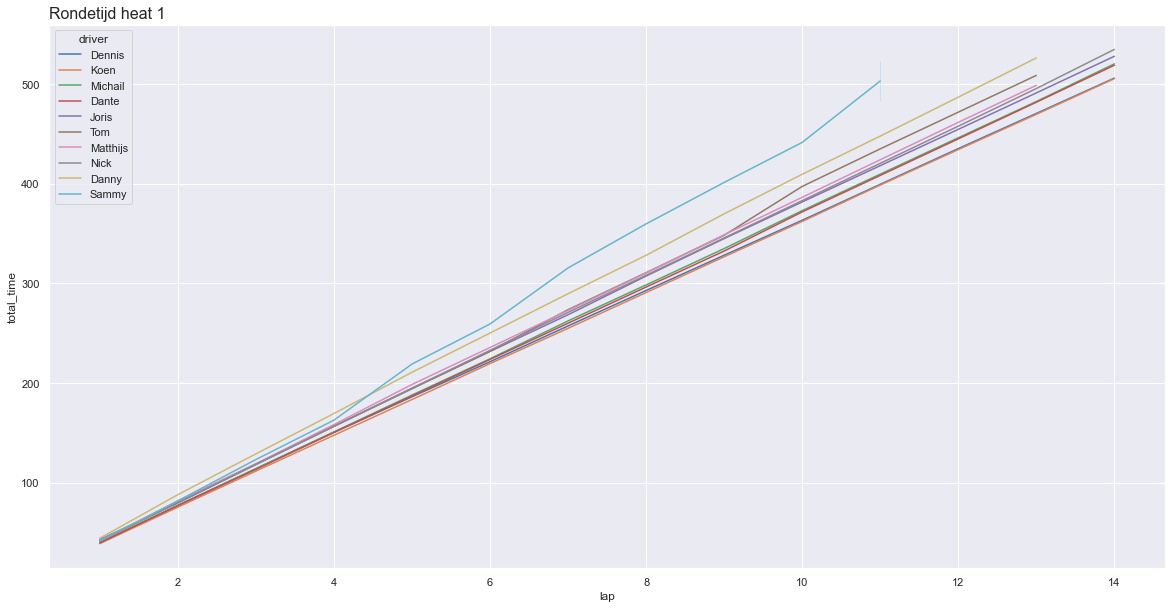

In [48]:
ax = sns.lineplot(
   data=heat_1,
    x="lap",
    y="total_time",
    hue="driver"
)
ax.set_title("Rondetijd heat 1", fontsize=16, loc="left")
plt.show()

In [24]:
heat_1

,location,heat_id,datetime,driver,lap,time,date,heat_min,track
0,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,1,98.93,2024-09-18,31.99,A
1,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,2,38.24,2024-09-18,31.99,A
2,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,3,34.29,2024-09-18,31.99,A
3,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,4,33.80,2024-09-18,31.99,A
4,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,5,31.99,2024-09-18,31.99,A
5,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,6,32.73,2024-09-18,31.99,A
6,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,7,33.51,2024-09-18,31.99,A
7,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,8,33.63,2024-09-18,31.99,A
8,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,9,36.84,2024-09-18,31.99,A
9,delft,2C9230D99C5B4D1D9879EEB354681CCE,woensdag 18 september 13:45,Armand Tevreden,10,33.95,2024-09-18,31.99,A


In [43]:
pivot_1 = heat_1.pivot_table(
    index="lap",
    columns="driver",
    values="total_time",
)

In [63]:
pivot_1

driver,Danny,Dante,Dennis,Joris,Koen,Matthijs,Michail,Nick,Sammy,Tom
lap,,,,,,,,,,
1,44.43,39.78,39.64,43.08,39.06,41.77,40.08,41.43,41.77,41.92
2,88.17,77.30,77.11,79.79,75.62,81.84,77.47,80.29,81.92,80.49
3,129.04,113.51,114.06,118.29,111.78,119.22,114.28,118.75,123.38,118.75
4,169.53,150.61,150.54,156.74,147.75,158.42,151.07,156.75,162.86,156.75
5,210.93,187.17,186.36,194.34,183.58,198.67,188.03,194.68,219.14,194.97
6,250.27,223.79,221.51,231.83,219.63,235.78,224.43,232.95,259.38,231.93
7,289.69,260.14,257.39,268.64,255.01,272.88,262.43,270.95,315.58,273.69
8,328.27,296.40,292.94,307.43,290.89,310.46,298.52,308.30,359.76,310.84
9,369.85,332.53,328.30,345.01,326.75,348.83,335.00,345.68,401.34,348.33


In [61]:
base = pivot_1.subtract(pivot_1[pivot_1.iloc[-1].idxmin()], axis=0)
unpivot = base.reset_index().melt(id_vars=["lap"], var_name="driver", value_name="seconds")

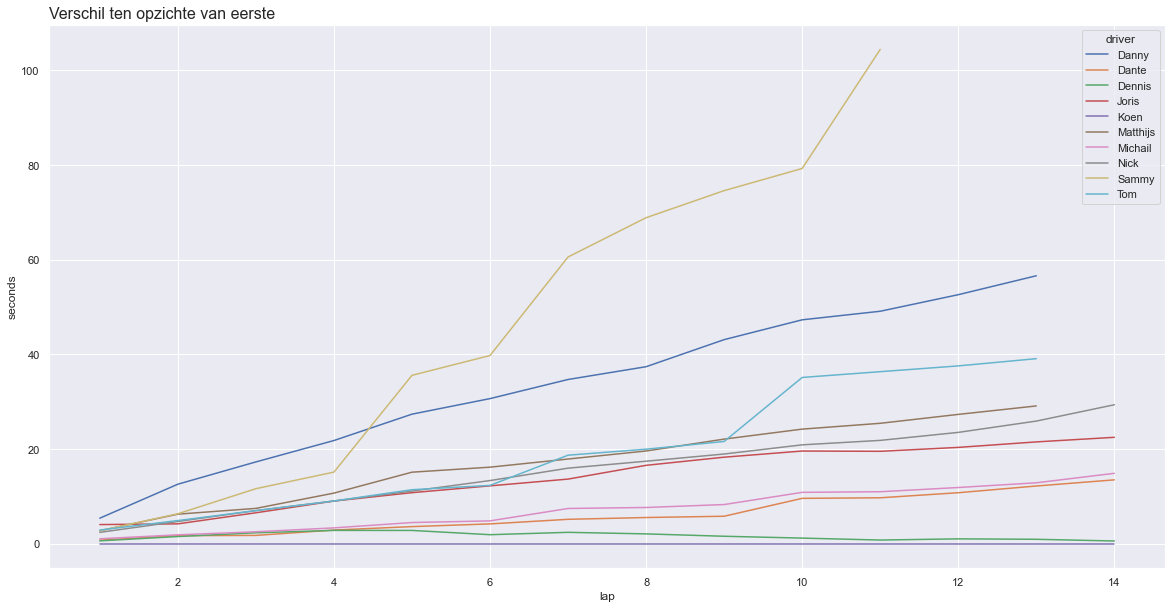

In [62]:
ax = sns.lineplot(
   data=unpivot,
    x="lap",
    y="seconds",
    hue="driver"
)
ax.set_title("Verschil ten opzichte van eerste", fontsize=16, loc="left")
plt.show()

## Heat 2

In [72]:
stat_1 = heat_1.groupby("driver")["seconds"].agg(["min", "mean", "max", "std"]).sort_values("min")

In [73]:
aa = stat_1.reset_index()

In [74]:
aa

,driver,min,mean,max,std
0,Dennis,35.08,36.14,39.64,1.22
1,Koen,35.36,36.10,39.06,0.92
2,Michail,36.09,37.16,40.08,1.05
3,Dante,36.13,37.07,39.78,1.11
4,Joris,36.41,37.71,43.08,1.74
5,Tom,36.81,39.13,49.00,3.40
6,Matthijs,37.10,38.36,41.77,1.50
7,Nick,37.28,38.20,41.43,1.11
8,Danny,38.28,40.48,44.43,1.90
9,Sammy,39.23,43.56,56.28,6.07


In [75]:
aa["b"] = aa["mean"] + 0.1

In [34]:
sns.set_theme(style="whitegrid")

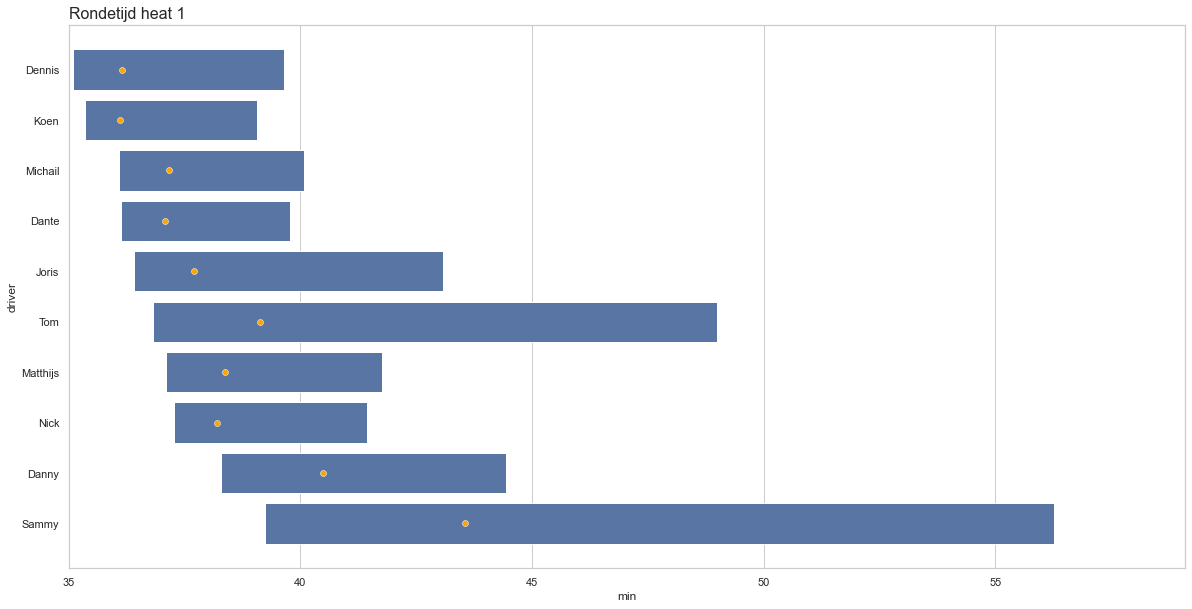

In [76]:
ax = sns.barplot(
    x=aa["max"],
    y=aa["driver"],
    color='b'
)
sns.barplot(
    x=aa["min"],
    y=aa["driver"],
    color='white'
)
sns.scatterplot(
    x=stat_1.reset_index()["mean"],
    y=stat_1.reset_index()["driver"],
    color='orange'
)
plt.xlim(35, None)

ax.set_title("Rondetijd heat 1", fontsize=16, loc="left")

plt.show()

In [39]:
sub_2 = heat_2[
    (heat_2["driver"] == "Dante")
    | (heat_2["driver"] == "Danny")
    | (heat_2["driver"] == "Tom")
    | (heat_2["driver"] == "Joris")
    | (heat_2["driver"] == "Matthijs")
]

In [68]:
a = heat_1.groupby("lap")[["seconds"]].agg(["mean", "std", "min", "max"])
a.columns.name = None
a.reset_index(inplace=True)

In [69]:
a["seconds"]

,mean,std,min,max
0,41.30,1.68,39.06,44.43
1,38.70,2.18,36.56,43.74
2,38.11,1.83,36.16,41.46
3,38.00,1.44,35.97,40.49
4,39.69,6.10,35.82,56.28
5,37.36,1.54,35.15,40.24
6,39.49,6.16,35.38,56.20
7,37.74,2.52,35.55,44.18
8,37.78,2.20,35.36,41.58
9,38.84,3.94,35.08,49.00


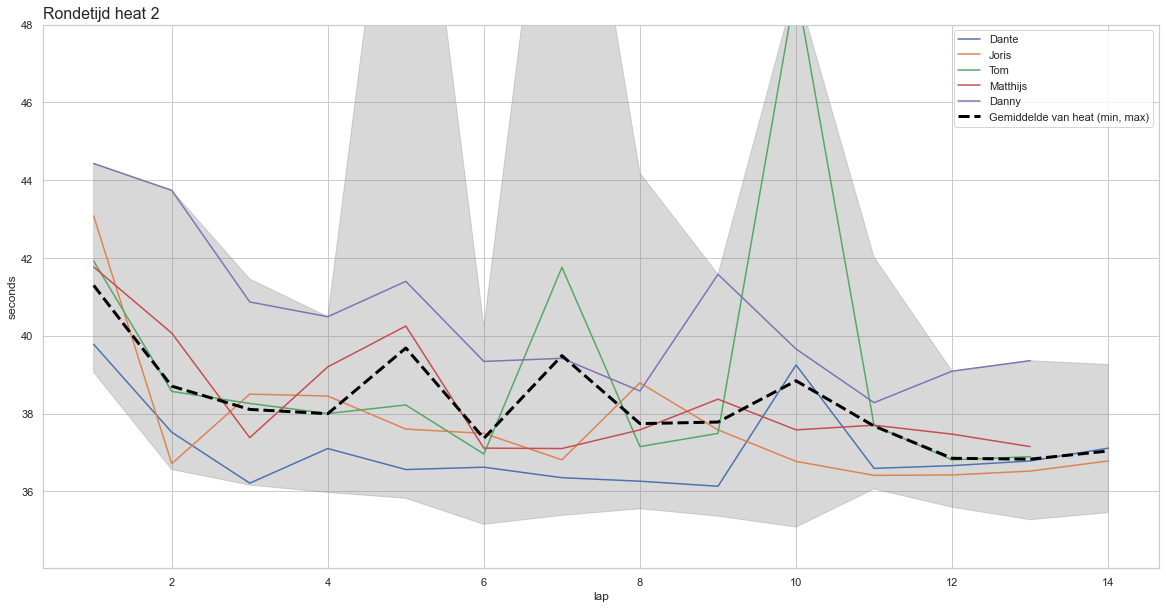

In [70]:
ax = sns.lineplot(
   data=sub_1,
    x="lap",
    y="seconds",
    hue="driver"
)

sns.lineplot(
   data=heat_1.groupby("lap")[["seconds"]].mean(),
    x="lap",
    y="seconds",
    color="black",
    label="Gemiddelde van heat (min, max)",
    lw=3,
    linestyle='--'
)
plt.fill_between(
    a["lap"],
    a["seconds"]["min"],
    a["seconds"]["max"],
    color="gray",
    alpha=0.3,
)
plt.ylim(None, 48)
ax.set_title("Rondetijd heat 2", fontsize=16, loc="left")
plt.show()

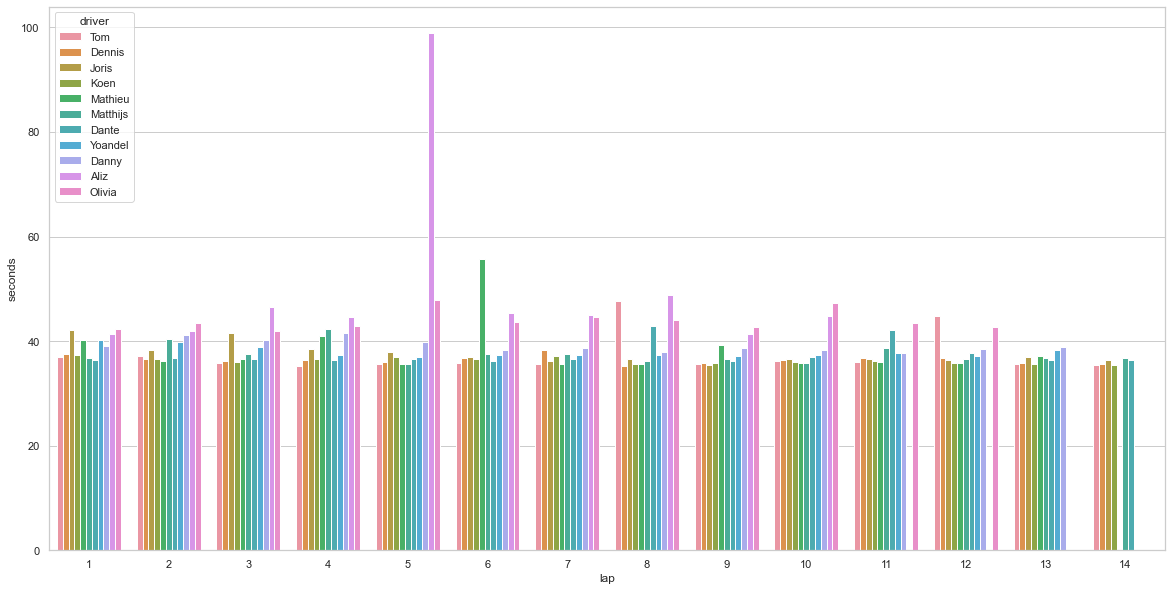

In [49]:
ax = sns.barplot(
   data=heat_2,
    x="lap",
    y="seconds",
    hue="driver"
)

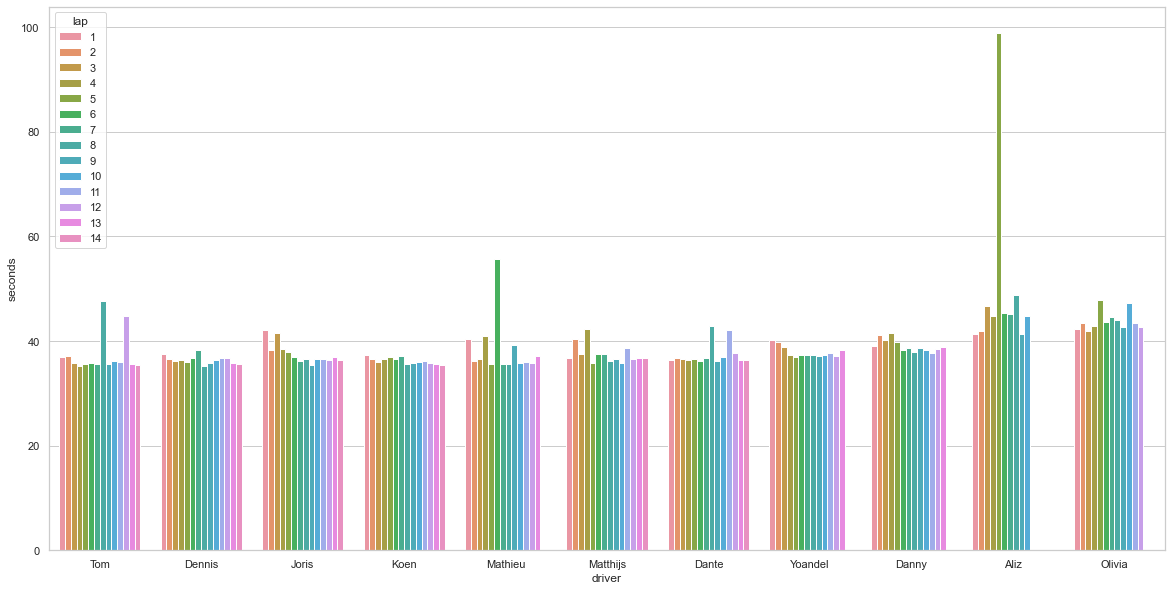

In [50]:
ax = sns.barplot(
   data=heat_2,
    hue="lap",
    y="seconds",
    x="driver"
)

## Player analysis

In [61]:
df.head()

,heat,lap,player,time
0,1,1,Dante,48.54
1,1,2,Dante,37.60
2,1,3,Dante,50.13
3,1,4,Dante,36.34
4,1,5,Dante,36.28


In [51]:
player = df[
    (df["driver"] == "Dante")
    | (df["driver"] == "Danny")
    | (df["driver"] == "Tom")
    | (df["driver"] == "Joris")
    | (df["driver"] == "Matthijs")
]

In [90]:
player

,heat,driver,lap,seconds
42,1,Dante,1,39.78
43,1,Dante,2,37.52
44,1,Dante,3,36.21
45,1,Dante,4,37.10
46,1,Dante,5,36.56
...,...,...,...,...
253,2,Danny,9,38.59
254,2,Danny,10,38.23
255,2,Danny,11,37.71
256,2,Danny,12,38.44


In [120]:
import numpy as np

In [121]:
a = player.pivot(index=["lap", "driver"], columns="heat", values="seconds").reset_index()
a["size"] = 100

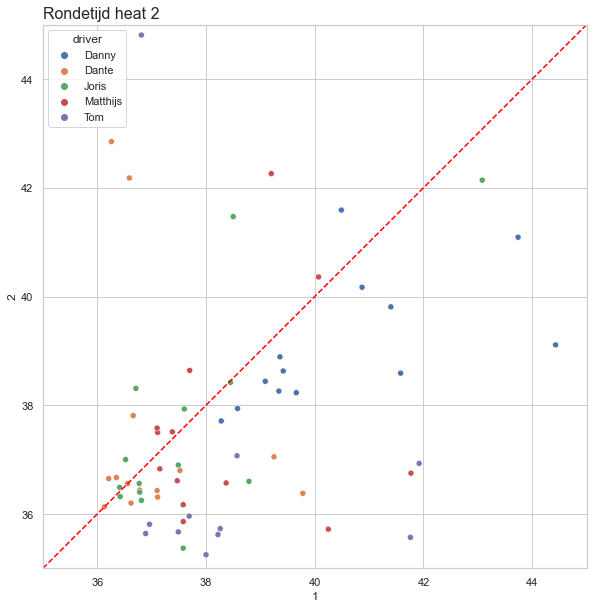

In [122]:
ax = sns.scatterplot(
    data=player.pivot(index=["lap", "driver"], columns="heat", values="seconds").reset_index(),
    x=1,
    y=2,
    hue="driver",
    sizes="size",
)

# Add a diagonal line (y = x)
x = np.linspace(35, 45, 100)  # Generate x values
plt.plot(x, x, color="red", linestyle="--", linewidth=1.5)

plt.ylim(35, 45)
plt.xlim(35, 45)
plt.gca().set_aspect('equal', adjustable='box')
ax.set_title("Rondetijd heat 2", fontsize=16, loc="left")
plt.show()

In [52]:
t = player.groupby(["heat", "driver"])["seconds"].agg(["min", "mean", "std", "count"])

In [53]:
t = t.reset_index()

In [54]:
t.pivot(index="driver", columns="heat", values=["min", "mean", "std", "count"])

min        mean        std      count      
heat         1     2     1     2    1    2     1     2
driver                                                
Danny    38.28 37.71 40.48 39.11 1.90 1.21 13.00 13.00
Dante    36.13 36.13 37.07 37.46 1.11 2.19 14.00 14.00
Joris    36.41 35.37 37.71 37.58 1.74 1.98 14.00 14.00
Matthijs 37.10 35.72 38.36 37.50 1.50 1.82 13.00 14.00
Tom      36.81 35.25 39.13 37.37 3.40 3.81 13.00 14.00

In [62]:
player.groupby(["heat", "driver"])["seconds"].min().reset_index()

,heat,driver,seconds
0,1,Danny,38.28
1,1,Dante,36.13
2,1,Joris,36.41
3,1,Matthijs,37.10
4,1,Tom,36.81
5,2,Danny,37.71
6,2,Dante,36.13
7,2,Joris,35.37
8,2,Matthijs,35.72
9,2,Tom,35.25


<AxesSubplot:xlabel='heat', ylabel='seconds'>

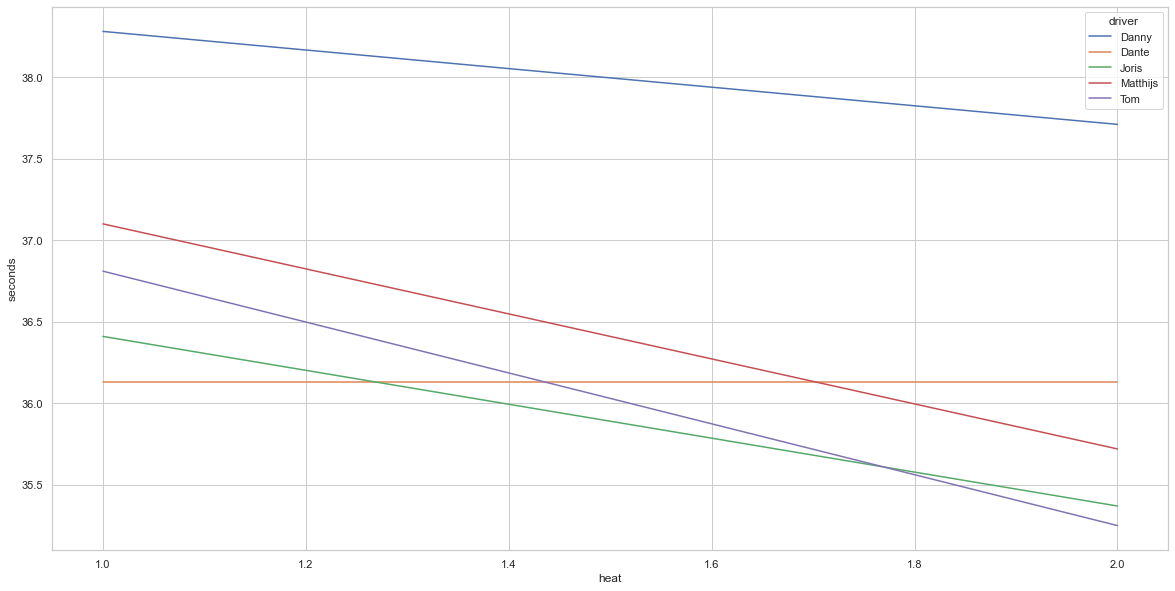

In [63]:
sns.lineplot(
    data=player.groupby(["heat", "driver"])["seconds"].min().reset_index(),
    x="heat",
    y="seconds",
    hue="driver"
)

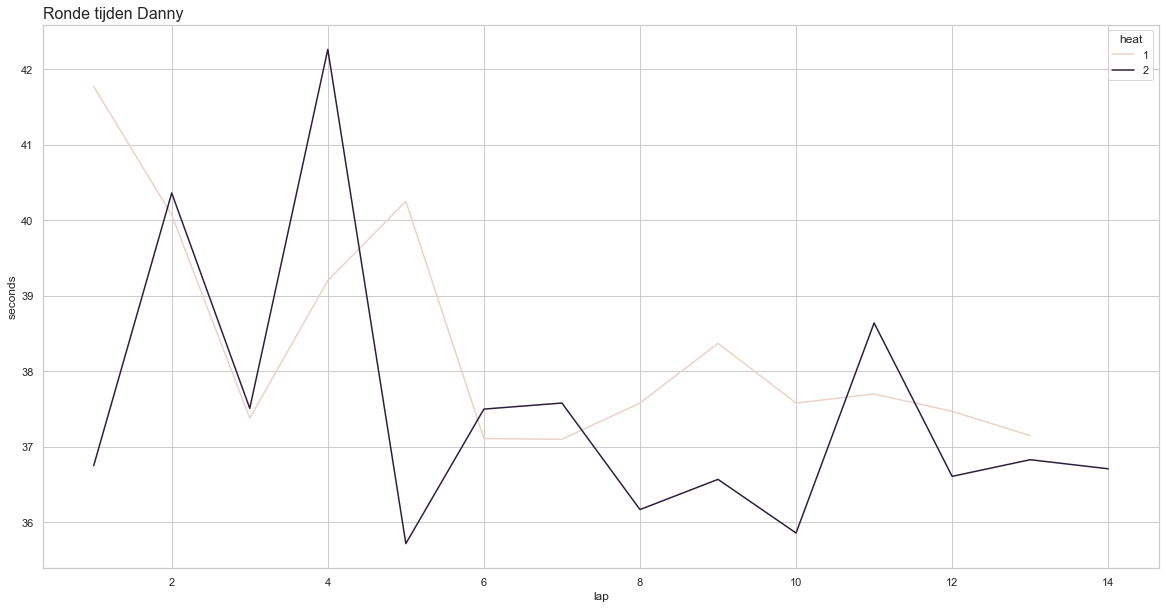

In [78]:
ax = sns.lineplot(
    data=player[player["driver"] == "Matthijs"],
    x="lap",
    y="seconds",
    hue="heat"
)
ax.set_title("Ronde tijden Danny", fontsize=16, loc="left")
# plt.ylim(None, 45)
plt.show()

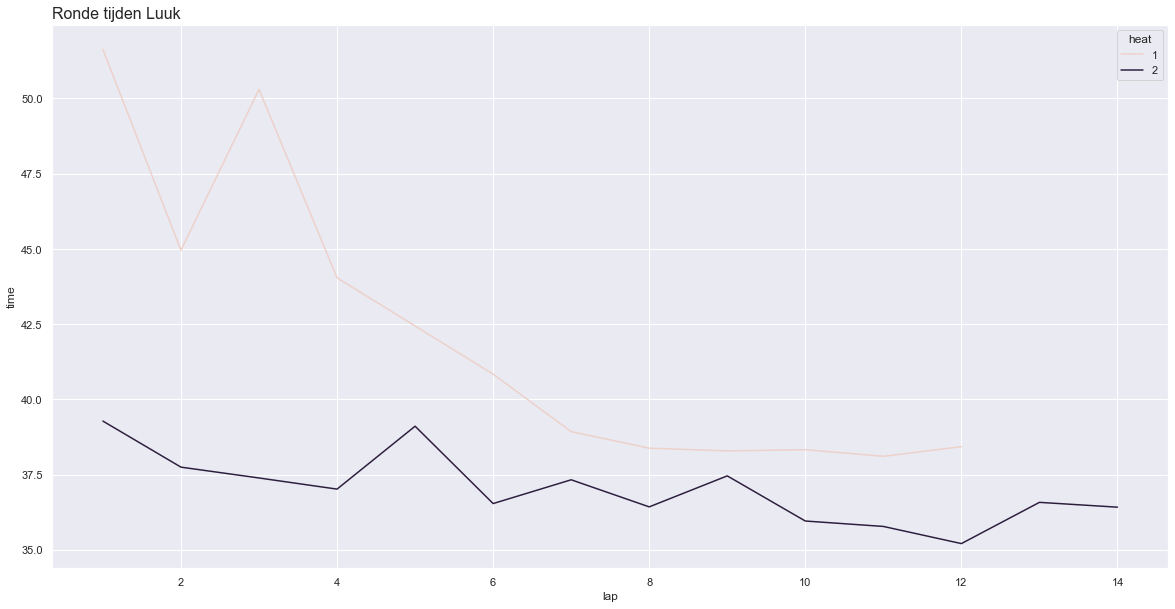

In [71]:
ax = sns.lineplot(
    data=player[player["player"] == "Luuk"],
    x="lap",
    y="time",
    hue="heat"
)
ax.set_title("Ronde tijden Luuk", fontsize=16, loc="left")

plt.show()

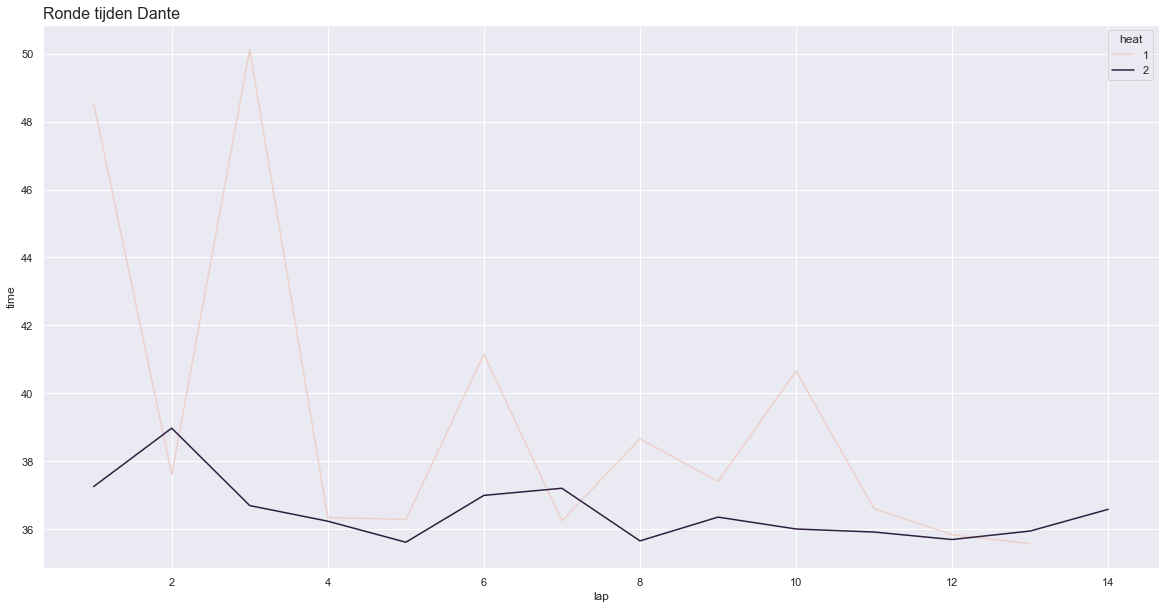

In [72]:
ax = sns.lineplot(
    data=player[player["player"] == "Dante"],
    x="lap",
    y="time",
    hue="heat"
)
ax.set_title("Ronde tijden Dante", fontsize=16, loc="left")

plt.show()

In [79]:
sub_2 = heat_2[
    (heat_2["driver"] == "Dante")
    | (heat_2["driver"] == "Danny")
    | (heat_2["driver"] == "Tom")
    | (heat_2["driver"] == "Joris")
    | (heat_2["driver"] == "Matthijs")
]

In [80]:
pivot = sub_2.pivot_table(
    index="lap", columns="driver", values="seconds"
)
pivot.columns.name = None
pivot.reset_index(inplace=True)

In [83]:
pivot["verschil_Joris_Matthijs"] = pivot["Joris"].sub(pivot["Matthijs"])
pivot["opgeteld_verschil_Joris_Matthijs"] = pivot["Joris"].sub(pivot["Matthijs"]).cumsum()
# pivot["verschil_luuk_mick"] = pivot["Luuk"].sub(pivot["Mick"]).cumsum()
# pivot["opgeteld_verschil_dante_mick"] = pivot["Dante"].sub(pivot["Mick"]).cumsum()
# pivot["verschil_dante_mick"] = pivot["Dante"].sub(pivot["Mick"])

In [84]:
pivot

,lap,Danny,Dante,Joris,Matthijs,Tom,verschil_Joris_Matthijs,opgeteld_verschil_Joris_Matthijs
0,1,39.11,36.38,42.14,36.75,36.93,5.39,5.39
1,2,41.09,36.80,38.31,40.36,37.07,-2.05,3.34
2,3,40.17,36.65,41.47,37.51,35.73,3.96,7.30
3,4,41.59,36.43,38.42,42.26,35.25,-3.84,3.46
4,5,39.81,36.56,37.93,35.72,35.62,2.21,5.67
5,6,38.26,36.20,36.90,37.50,35.81,-0.60,5.07
6,7,38.63,36.67,36.25,37.58,35.57,-1.33,3.74
7,8,37.94,42.85,36.60,36.17,47.58,0.43,4.17
8,9,38.59,36.13,35.37,36.57,35.67,-1.20,2.97
9,10,38.23,37.05,36.56,35.86,36.12,0.70,3.67


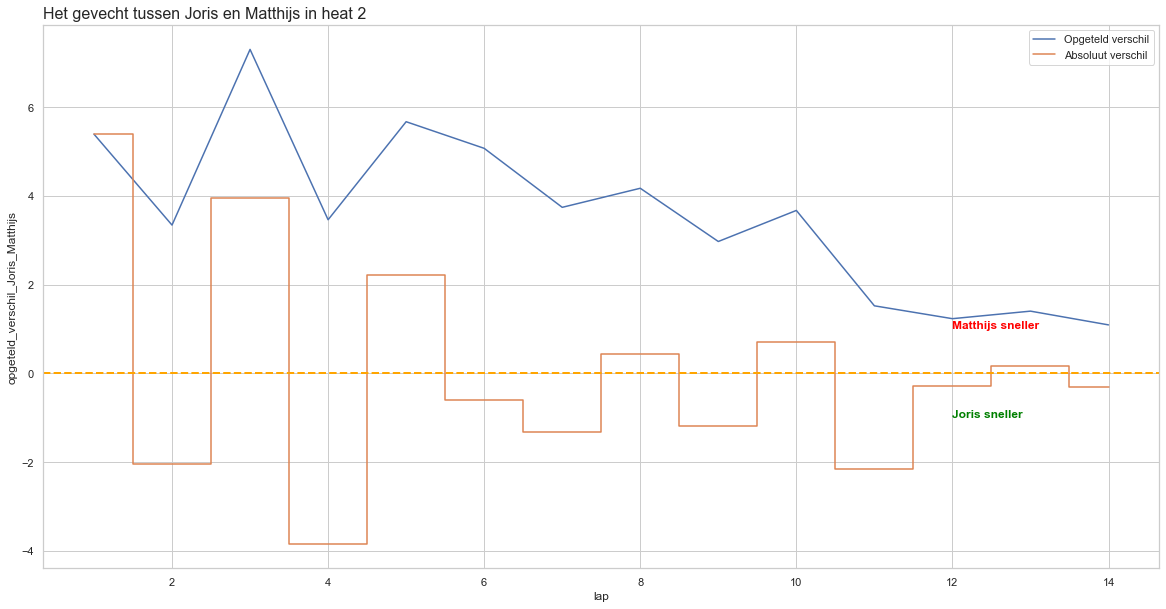

In [85]:
ax = sns.lineplot(
    x=pivot["lap"],
    y=pivot["opgeteld_verschil_Joris_Matthijs"],
    label="Opgeteld verschil"
)
ax.step(
    x=pivot["lap"],
    y=pivot["verschil_Joris_Matthijs"],
    label="Absoluut verschil",
     where='mid'
)
ax.set_title("Het gevecht tussen Joris en Matthijs in heat 2", fontsize=16, loc="left")
plt.axhline(y=0, color='orange', linestyle='--', linewidth=2)

plt.text(x=12, y=-1, s="Joris sneller", color='Green', fontsize=12, fontweight='bold')
plt.text(x=12, y=1, s="Matthijs sneller", color='Red', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

In [210]:
fastest = pd.DataFrame({
    "Player": ["Luuk", "Dante", "Mick"],
    "Fastest lap": [35.21, 35.57, 35.67],
    "Diff": ["-", "+1,02%", "+0,28%"],
    "Snelste van dag": [34.82, 34.82, 34.82],
    "Snelste van maand": [34.25, 34.25, 34.25],
    "Snelste ooit": [32.62, 34.25, 34.25],
    
})

In [211]:
fastest

,Player,Fastest lap,Diff,Snelste van dag,Snelste van maand,Snelste ooit
0,Luuk,35.21,-,34.82,34.25,32.62
1,Dante,35.57,"+1,02%",34.82,34.25,34.25
2,Mick,35.67,"+0,28%",34.82,34.25,34.25


## Laptijden

In [8]:
df.head()

,location,heat_id,heat,datetime,driver,lap,time
0,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,1,36.19
1,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,2,34.24
2,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,3,30.28
3,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,4,31.01
4,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,5,30.41


In [88]:
df.head()

,location,heat_id,heat,datetime,driver,lap,time,date
0,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,1,98.93,2024-09-18
1,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,2,38.24,2024-09-18
2,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,3,34.29,2024-09-18
3,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,4,33.80,2024-09-18
4,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,5,31.99,2024-09-18


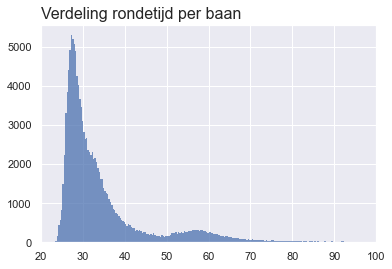

In [9]:
ax = sns.histplot(
    data=df,
    x="time",
#     hue="track"
)
plt.xlim(20, 100)

ax.set_title("Verdeling rondetijd per baan", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [9]:
df["heat_min"] = df.groupby("heat_id")["time"].transform('min') # transform(lambda x: x.nsmallest(1).mean())
df["track"] = df["heat_min"].apply(lambda x: 'A' if x < 34.37 else ('B' if x < 60.24 else 'C'))

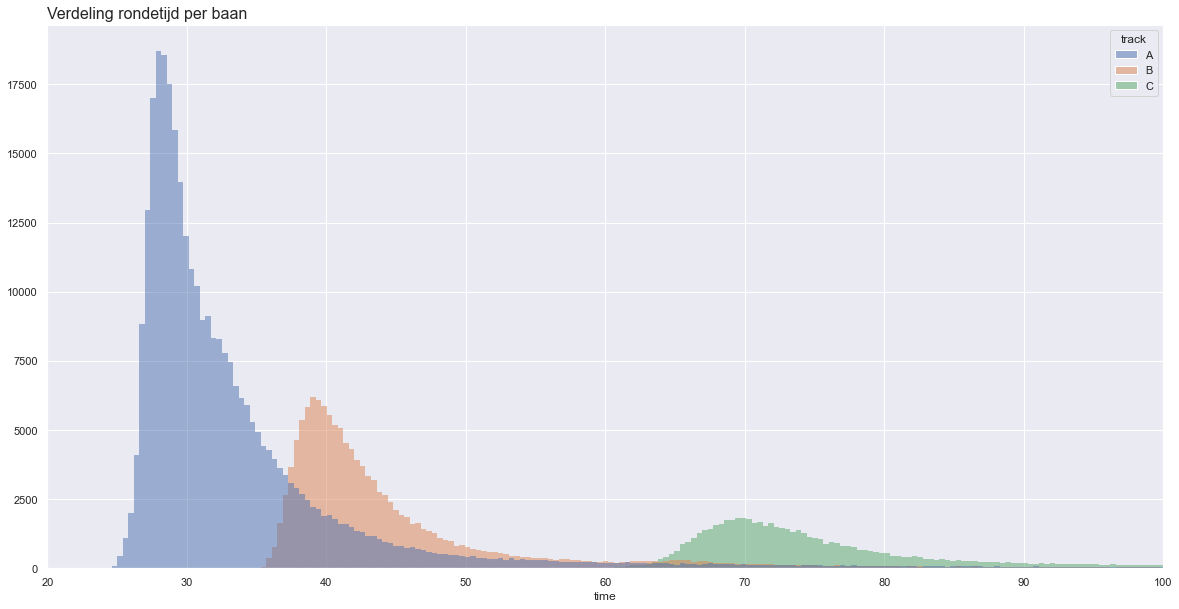

In [14]:
ax = sns.histplot(
    data=df,
    x="time",
    hue="track"
)
plt.xlim(20, 100)

ax.set_title("Verdeling rondetijd per baan", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

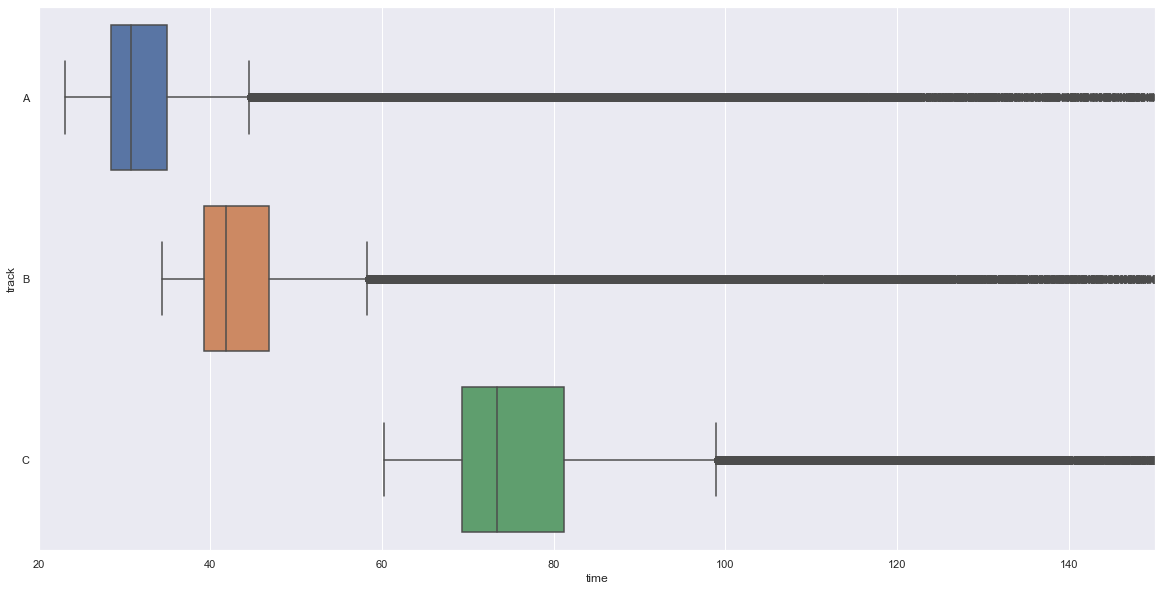

In [126]:
sns.boxplot(
    data=df,
    x="time",
    y="track"
)
plt.xlim(20, 150)
plt.show()

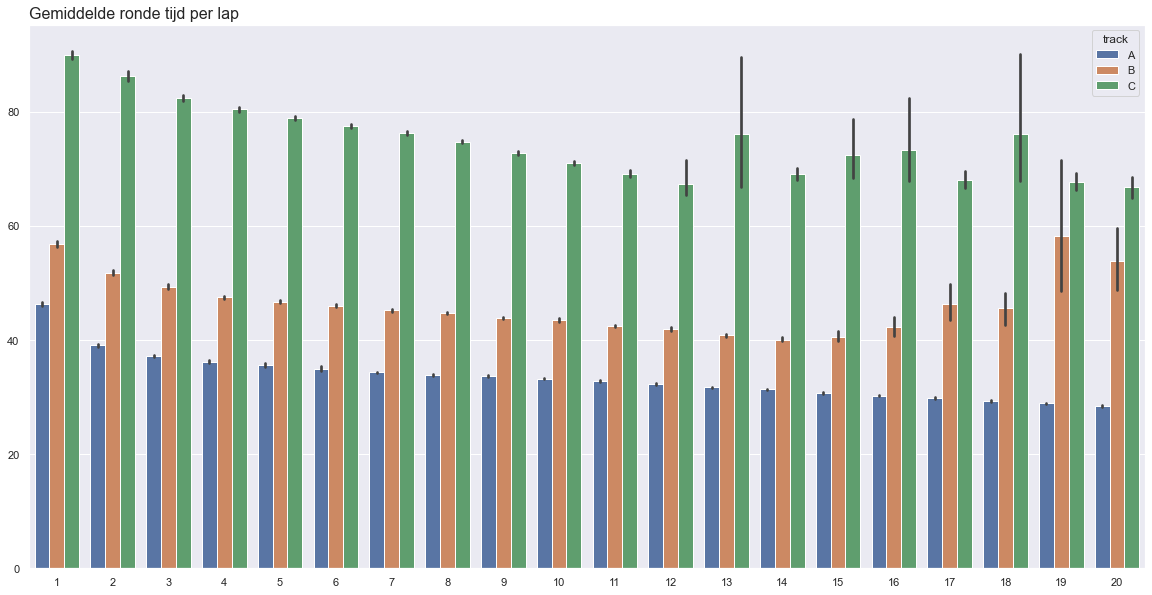

In [188]:
ax = sns.barplot(
    data=df[df["lap"] <= 20],
    x="lap",
    y="time",
    hue="track"
)

ax.set_title("Gemiddelde ronde tijd per lap", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [ ]:
# 24CD860A65B74879B3D181DA3E4F18E2
# 9201598853044CE594DCB1A7BBE8FAA1

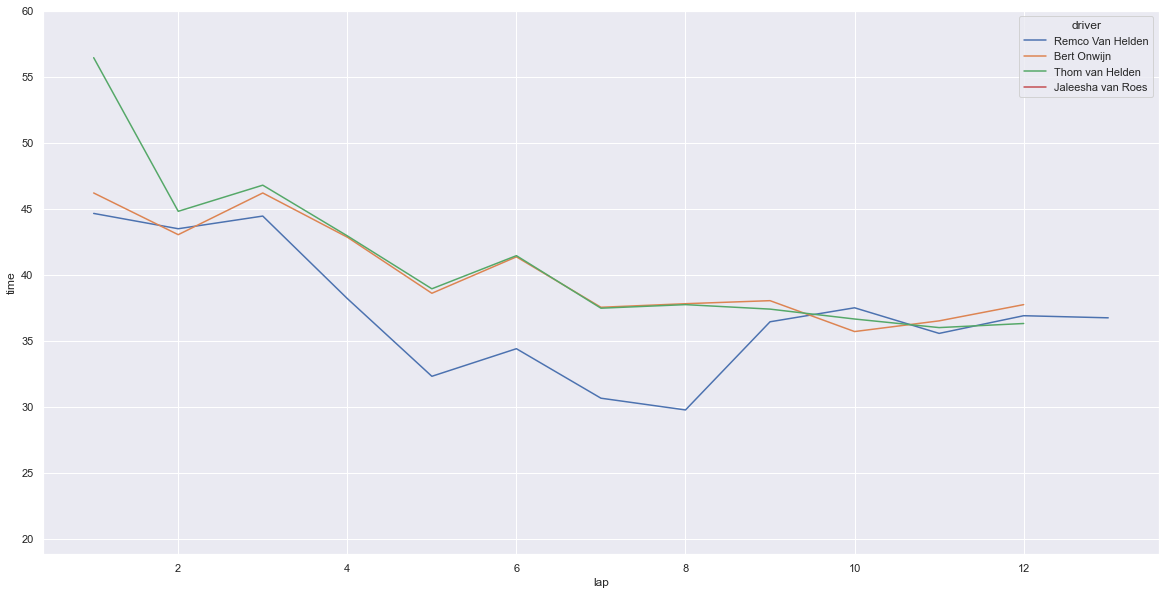

In [213]:
ax = sns.lineplot(
    data=df[df["heat_id"] == "97C9FE84373C476E945D3A1AE6E2DBB8"],
    x="lap",
    y="time",
    hue="driver"
)
plt.ylim(None, 60)
plt.show()

In [4]:
# totale duur van een heat

In [10]:
df.head()

,location,heat_id,heat,datetime,driver,lap,time,date,heat_min,track
0,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,1,98.93,2024-09-18,31.99,A
1,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,2,38.24,2024-09-18,31.99,A
2,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,3,34.29,2024-09-18,31.99,A
3,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,4,33.80,2024-09-18,31.99,A
4,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,5,31.99,2024-09-18,31.99,A


In [28]:
t = df.groupby(["track", "heat_id", "driver"])["time"].sum().reset_index().groupby(["track", "heat_id"])["time"].max().reset_index()

In [29]:
t["time"] = t["time"]/60

In [30]:
t.head()

,track,heat_id,time
0,A,0003A4A9E1F944D686BC8B472DB5812F,9.90
1,A,001608D1E8DB4312BB70B193A1DD02F9,8.38
2,A,001DC63E51384623BCC3179F24FC125F,8.54
3,A,001DD868CAC84A6CAC8BD4D986C36792,9.59
4,A,0053CD23F01B4B1B8CC405BF20CF75E1,9.52


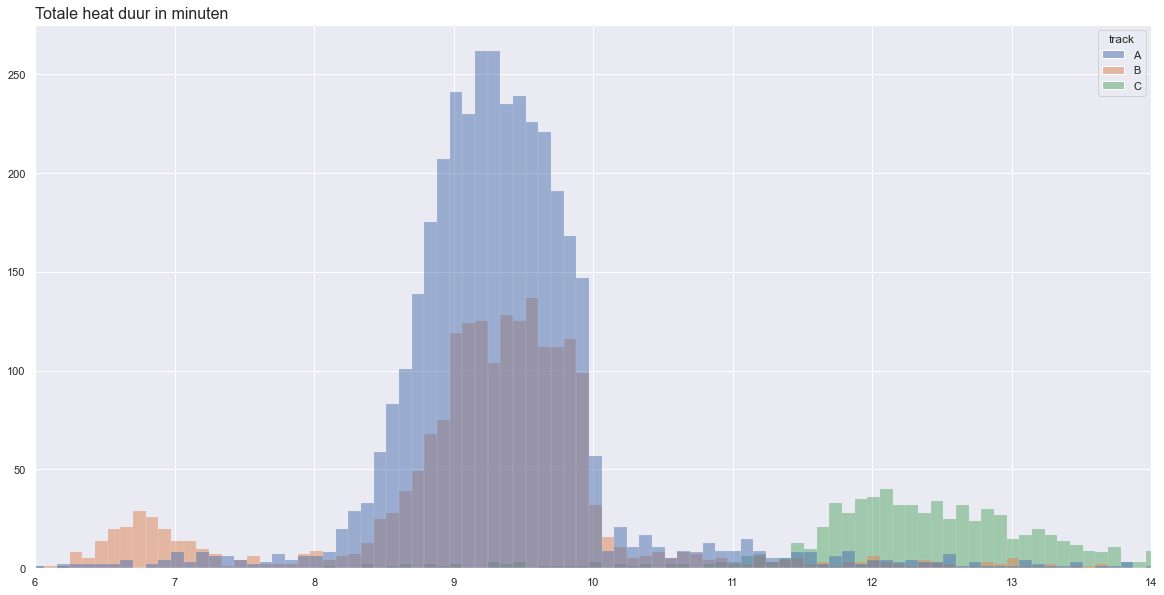

In [33]:
ax = sns.histplot(
    data=t,
    x="time",
    hue="track"
)
plt.xlim(6, 14)

ax.set_title("Totale heat duur in minuten", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_xlabel(None)

plt.show()

In [201]:
df[df["heat_id"] == "9201598853044CE594DCB1A7BBE8FAA1"].sort_values("time").head()

,location,heat_id,heat,datetime,driver,lap,time,date,month,heat_min,track
30075,delft,9201598853044CE594DCB1A7BBE8FAA1,Heat 41,dinsdag 22 oktober 20:00,Mart Keijzer,15,23.27,2024-10-22,10,23.27,A
30089,delft,9201598853044CE594DCB1A7BBE8FAA1,Heat 41,dinsdag 22 oktober 20:00,Amado Vrieswijk,10,25.74,2024-10-22,10,23.27,A
30084,delft,9201598853044CE594DCB1A7BBE8FAA1,Heat 41,dinsdag 22 oktober 20:00,Amado Vrieswijk,5,25.76,2024-10-22,10,23.27,A
30094,delft,9201598853044CE594DCB1A7BBE8FAA1,Heat 41,dinsdag 22 oktober 20:00,Amado Vrieswijk,15,25.78,2024-10-22,10,23.27,A
30091,delft,9201598853044CE594DCB1A7BBE8FAA1,Heat 41,dinsdag 22 oktober 20:00,Amado Vrieswijk,12,25.81,2024-10-22,10,23.27,A


<AxesSubplot:xlabel='lap', ylabel='time'>

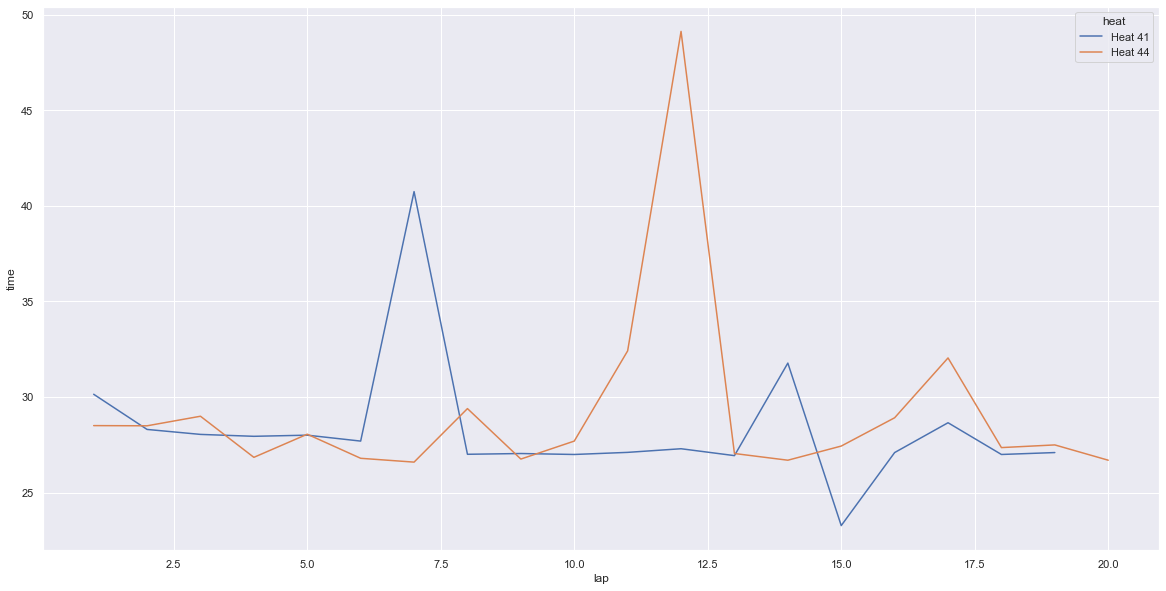

In [200]:
sns.lineplot(
    data=df[df["driver"] == 'Mart Keijzer'],
    x="lap",
    y="time",
    hue="heat"
)

In [210]:
df[df["driver"] == 'Jaleesha van Roes']

,location,heat_id,heat,datetime,driver,lap,time,date,month,heat_min,track
510281,delft,97C9FE84373C476E945D3A1AE6E2DBB8,Heat 17,woensdag 10 juli 15:12,Jaleesha van Roes,1,248.49,2024-07-10,7,29.75,A
510282,delft,97C9FE84373C476E945D3A1AE6E2DBB8,Heat 17,woensdag 10 juli 15:12,Jaleesha van Roes,2,215.84,2024-07-10,7,29.75,A


In [179]:
# snelste coureur

In [209]:
df[df["track"] == 'A'].groupby("driver")["time"].agg(["min", "mean", "std"]).sort_values("min").head(5)

,min,mean,std
driver,,,
Ali Alamri,23.03,33.22,15.84
Mart Keijzer,23.27,28.75,4.26
Renzo Bootsma,23.42,27.36,1.51
Alexander Samson,23.64,39.44,11.77
Paul Schlomer,24.49,40.16,16.19


In [184]:
df[df["track"] == 'B'].groupby("driver")["time"].agg(["min", "mean", "std"]).sort_values("min").head(5)

,min,mean,std
driver,,,
Luca,34.37,47.42,17.11
Sem,34.38,61.07,42.08
Hoppenbrouwers,34.38,83.11,152.38
Yvonne,34.38,44.53,64.16
Ryan,34.39,45.05,12.86


In [207]:
df[df["track"] == 'C'].groupby("driver")["time"].agg(["min", "mean", "std"]).sort_values("min").head(5)

,min,mean,std
driver,,,
Ralph,60.24,71.89,13.83
Jussie (geilerd),60.49,66.29,7.40
Yanno,60.54,68.20,17.37
Juuso Soudunsaari,60.59,83.77,25.95
Kalika,60.73,80.78,28.67


In [92]:
df.head()

,location,heat_id,heat,datetime,driver,lap,time,date,month
0,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,1,98.93,2024-09-18,9
1,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,2,38.24,2024-09-18,9
2,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,3,34.29,2024-09-18,9
3,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,4,33.80,2024-09-18,9
4,delft,2C9230D99C5B4D1D9879EEB354681CCE,Heat 10,woensdag 18 september 13:45,Armand Tevreden,5,31.99,2024-09-18,9


In [91]:
df["month"] = df["date"].dt.month

In [113]:
temp = df[df["month"] == 7].copy()
temp["range"] = np.arange(len(temp))

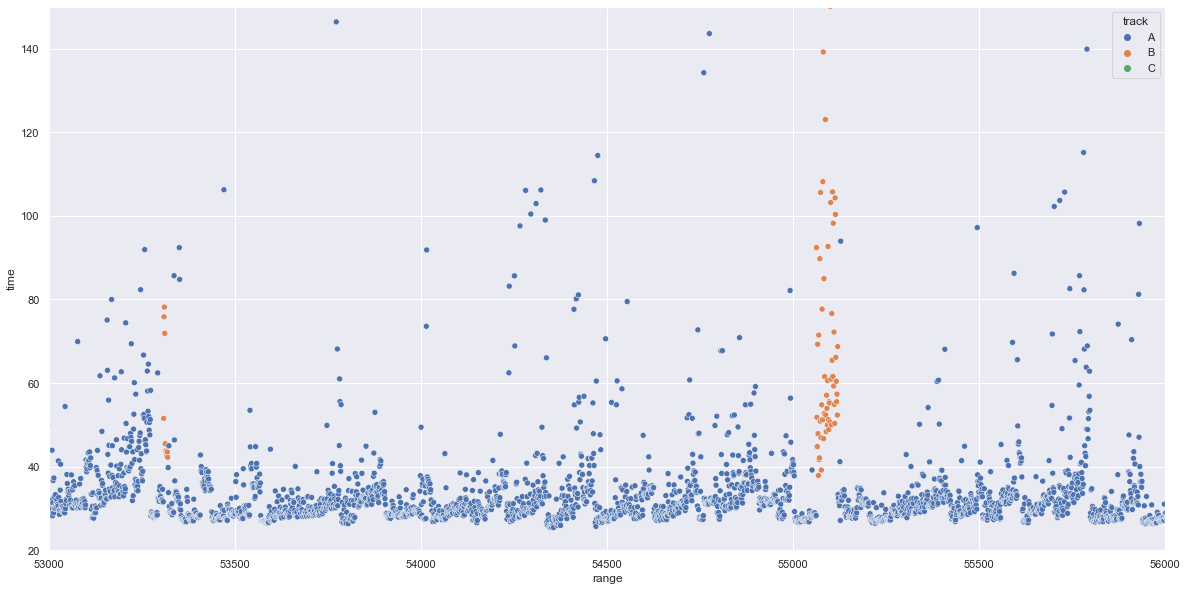

In [117]:
sns.scatterplot(
    data=temp,
    x="range",
    y="time",
    hue="track"
)
plt.ylim(20, 150)
plt.xlim(53000, 56000)

plt.show()

## Aantallen

In [234]:
drivers = df[["date", "heat_id", "driver"]].drop_duplicates()

In [247]:
drivers["year"] = drivers["date"].dt.year
drivers["month"] = drivers["date"].dt.month
drivers["weekday"] = drivers["date"].dt.weekday
drivers["omzet"] = 31

In [243]:
drivers.head()

,date,heat_id,driver,year,month,omzet
0,2024-09-18,2C9230D99C5B4D1D9879EEB354681CCE,Armand Tevreden,2024,9,31
16,2024-09-18,2C9230D99C5B4D1D9879EEB354681CCE,Alexei Tevreden,2024,9,31
27,2024-09-18,C080CAA5EFC74BA393C97BD589E57E1E,David,2024,9,31
40,2024-09-18,C080CAA5EFC74BA393C97BD589E57E1E,Youssef,2024,9,31
51,2024-09-18,C080CAA5EFC74BA393C97BD589E57E1E,Mees,2024,9,31


In [251]:
# aantal heats per maand
drivers.groupby("month")["heat_id"].nunique()

month
5       53
6     1060
7     1098
8     1176
9      938
10    1123
11    1153
12     123
Name: heat_id, dtype: int64

In [253]:
# aantal spelers per maand
drivers.groupby("month")["heat_id"].count()

month
5      422
6     6732
7     6091
8     6793
9     5694
10    6813
11    7530
12     628
Name: heat_id, dtype: int64

In [254]:
# Geschatte omzet
drivers.groupby("month")["omzet"].sum()

month
5      13082
6     208692
7     188821
8     210583
9     176514
10    211203
11    233430
12     19468
Name: omzet, dtype: int64

## Dubbele heats

In [280]:
dag = drivers.groupby("date")["driver"].count().reset_index()
dag["nunique"] = drivers.groupby("date")["driver"].nunique().reset_index()["driver"]

In [297]:
dag.head()

,date,driver,nunique
0,2024-05-30,202,154
1,2024-05-31,219,118
2,2024-06-01,364,213
3,2024-06-02,409,265
4,2024-06-03,70,54


In [290]:
mul = drivers.groupby(["date", "driver"])["heat_id"].count().reset_index()

In [301]:
mul.head()

,date,driver,heat_id,month
0,2024-05-30,Aart den Besten,1,5
1,2024-05-30,Annold Vermeulen,2,5
2,2024-05-30,Appie Sam,1,5
3,2024-05-30,Ard Egas,1,5
4,2024-05-30,Arie Wemmers,1,5


In [292]:
mul["month"] = mul["date"].dt.month

In [298]:
numbe = mul.groupby(["month", "heat_id"])["driver"].count().reset_index()

<AxesSubplot:xlabel='month', ylabel='driver'>

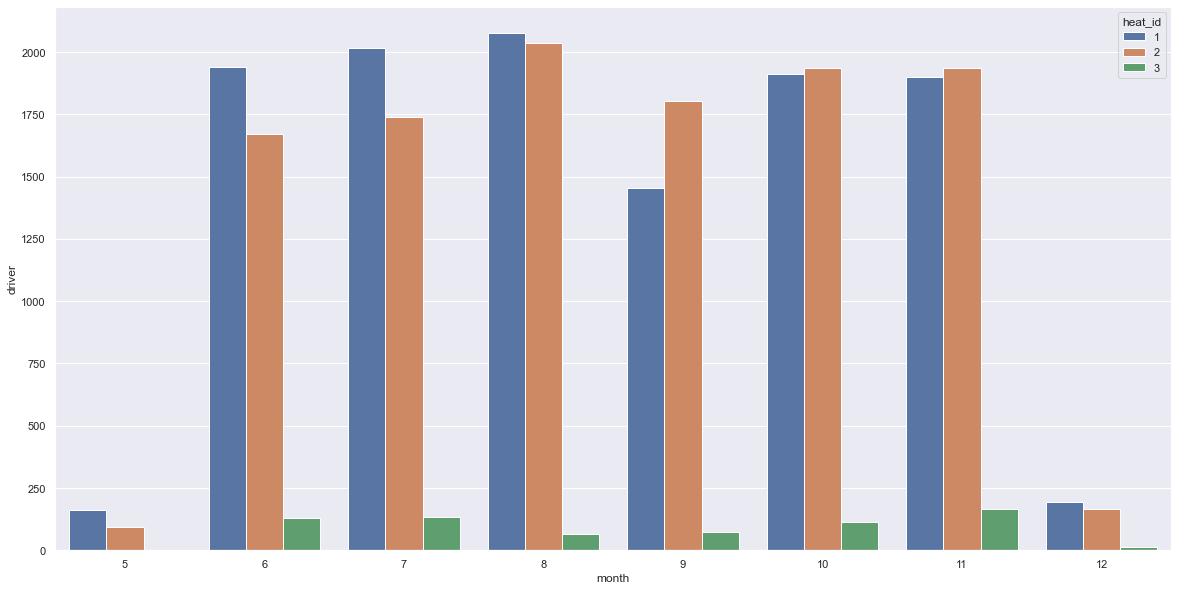

In [299]:
sns.barplot(
    data=numbe[numbe["heat_id"] < 4],
    x="month",
    y="driver",
    hue="heat_id"
)

## Groepen

In [311]:
drivers[drivers["date"] == "2024-05-30"].head()

,date,heat_id,driver,year,month,omzet,weekday
67668,2024-05-30,DADD11443B3947378AFC146B996BE934,Chris Van der Meer,2024,5,31,3
67675,2024-05-30,DADD11443B3947378AFC146B996BE934,Dilano De Bruijn,2024,5,31,3
67682,2024-05-30,DADD11443B3947378AFC146B996BE934,Johnny Kerkvliet,2024,5,31,3
67689,2024-05-30,DADD11443B3947378AFC146B996BE934,Willy Mardenborough,2024,5,31,3
67695,2024-05-30,DADD11443B3947378AFC146B996BE934,Yafet Habtom,2024,5,31,3


In [321]:
drivers[drivers["date"] == "2024-05-30"].groupby("driver")["heat_id"].count().reset_index().sort_values("heat_id").tail(20)

,driver,heat_id
89,Matthijs Boele,2
101,Niels Boere,2
36,Guido de Mik,2
34,Gijs Langejans,2
45,Jeroen Roodenburg,2
106,RS Mohan,2
107,Rafal Sielewicz,2
31,Frank Chauthi,2
110,Ricardo de Jong,2
85,Mark van Heijst,2


In [319]:
drivers[
    (drivers["date"] == "2024-05-30")
    & (drivers["driver"] == "Lars Otterspeer")
]

,date,heat_id,driver,year,month,omzet,weekday
68152,2024-05-30,4FE0B5D336974B32BA12AE8A54A6E706,Lars Otterspeer,2024,5,31,3
68283,2024-05-30,1A8CDCDB3690402BB344F26BB29A99E2,Lars Otterspeer,2024,5,31,3


In [327]:
pd.concat([
    drivers[
        (drivers["date"] == "2024-05-30")
        & (drivers["heat_id"] == "4FE0B5D336974B32BA12AE8A54A6E706")
    ],
    drivers[
        (drivers["date"] == "2024-05-30")
        & (drivers["heat_id"] == "1A8CDCDB3690402BB344F26BB29A99E2")
    ]
])["driver"].drop_duplicates()

68137           Ricardo de Jong
68144           Johan V/d Velde
68152           Lars Otterspeer
68159         Bastiaan Molenaar
68167               Niels Boere
68175          Annold Vermeulen
68182           Rokus V/d Broek
68189               Marcel Ooms
68196         Lennard Heuvelman
68203            Michael V Dijk
68210           Carlo Versluijs
68217                 Sem Pekel
68224            Matthijs Boele
68231                  Mark Bot
68238            Jacob de Zeeuw
68245            Stefan Captein
68252              Maurien Plug
68291                 Marc Plug
68300         Marcel Daalhuizen
68308    Laurens van de Giessen
68316             Leander Kerst
68324             Koen van Dijk
68331               Kor Larooij
68339              Kees Verwaal
68347              Luuk Konings
68355                Marco Both
68362              Marco Dekker
68369               Levi Alblas
68376           Laurens Marelis
68382              Ronald Peter
Name: driver, dtype: object

In [329]:
a = drivers[
    (drivers["date"] == "2024-05-30")
    & (drivers["heat_id"] == "4FE0B5D336974B32BA12AE8A54A6E706")
]#["driver"]

In [330]:
b = drivers[
    (drivers["date"] == "2024-05-30")
    & (drivers["heat_id"] == "1A8CDCDB3690402BB344F26BB29A99E2")
]

In [331]:
a[a["driver"].isin(b["driver"])]

,date,heat_id,driver,year,month,omzet,weekday
68152,2024-05-30,4FE0B5D336974B32BA12AE8A54A6E706,Lars Otterspeer,2024,5,31,3
68189,2024-05-30,4FE0B5D336974B32BA12AE8A54A6E706,Marcel Ooms,2024,5,31,3
68196,2024-05-30,4FE0B5D336974B32BA12AE8A54A6E706,Lennard Heuvelman,2024,5,31,3
68231,2024-05-30,4FE0B5D336974B32BA12AE8A54A6E706,Mark Bot,2024,5,31,3


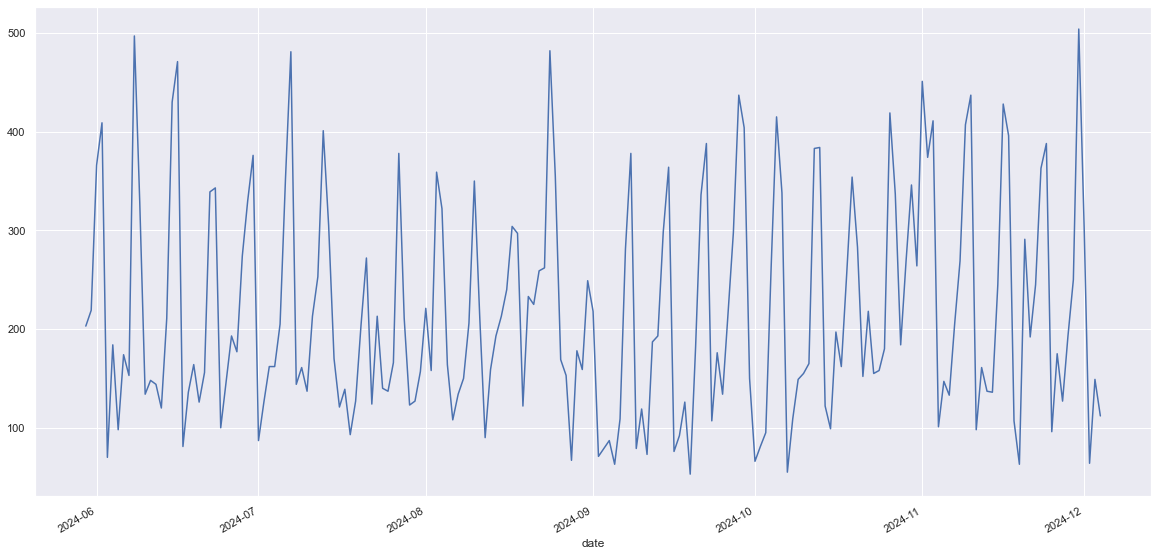

In [235]:
drivers.groupby("date")["heat_id"].count().plot();

<AxesSubplot:xlabel='date'>

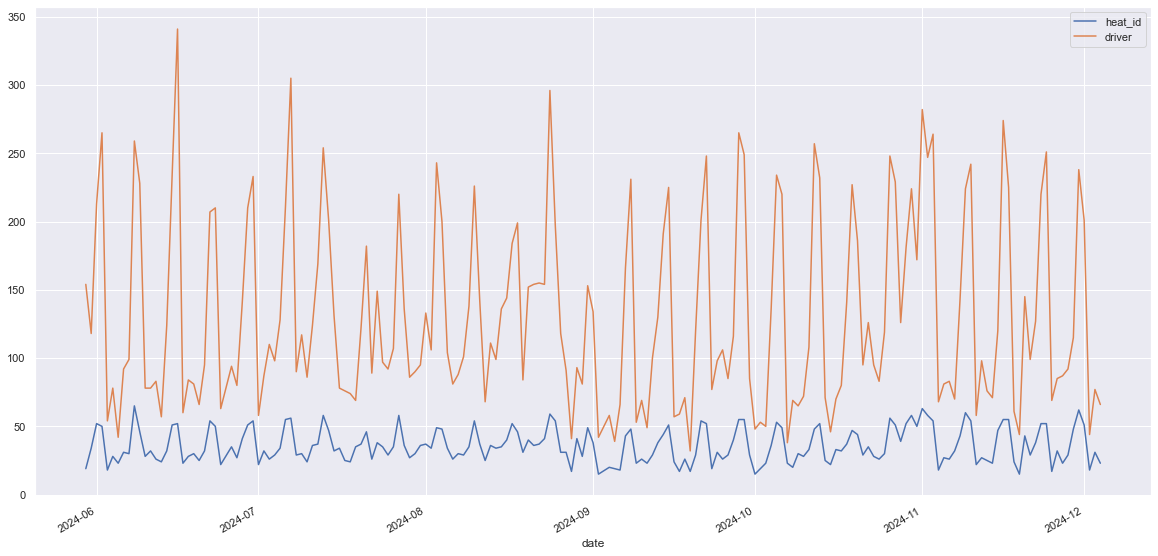

In [222]:
df.groupby("date")[["heat_id", "driver"]].nunique().plot()

## Amsterdam

In [31]:
df.head()

,location,heat_id,heat,datetime,driver,lap,time
0,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,1,36.19
1,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,2,34.24
2,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,3,30.28
3,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,4,31.01
4,amsterdam,1115C8026A4C457083D7813AED7641B1,Heat 10,2024-01-01 12:48:00,Rickert,5,30.41


In [42]:
df["date"] = df["datetime"].dt.date
df["hour"] = df["datetime"].dt.hour
df["weekday"] = df["datetime"].dt.weekday

In [77]:
df["heat_min"] = df.groupby("heat_id")["time"].transform('min')
df["track"] = df["heat_min"].apply(lambda x: 'A' if x < 48.67 else 'B')

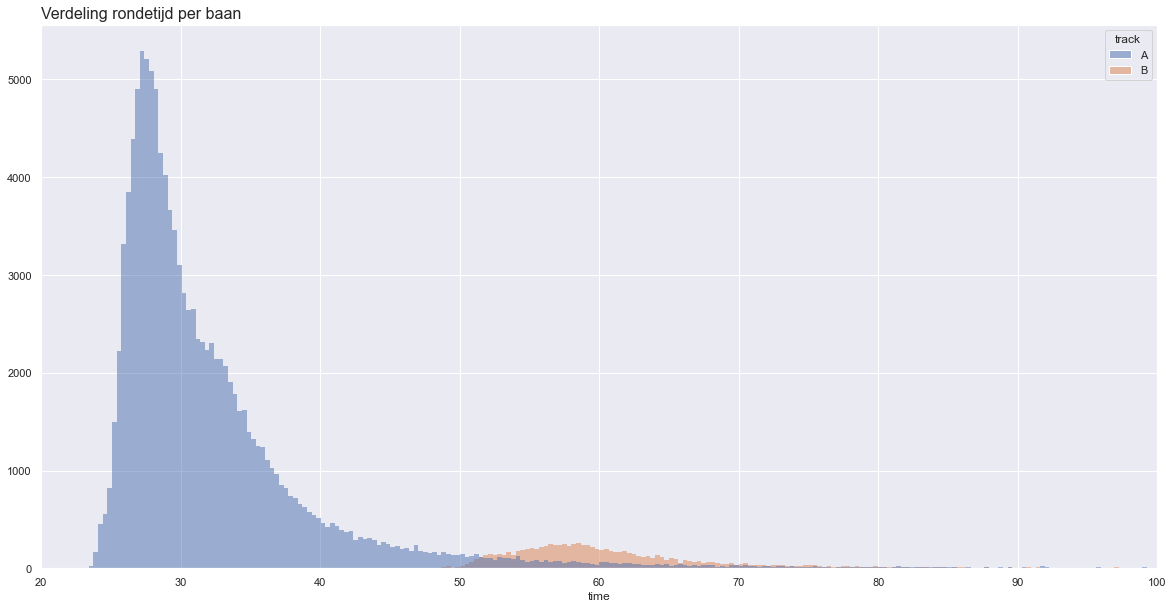

In [78]:
ax = sns.histplot(
    data=df,
    x="time",
    hue="track"
)
plt.xlim(20, 100)

ax.set_title("Verdeling rondetijd per baan", fontsize=16, loc="left")
ax.set_ylabel(None)
ax.set_ylabel(None)

plt.show()

In [64]:
df["range"] = np.arange(len(df))

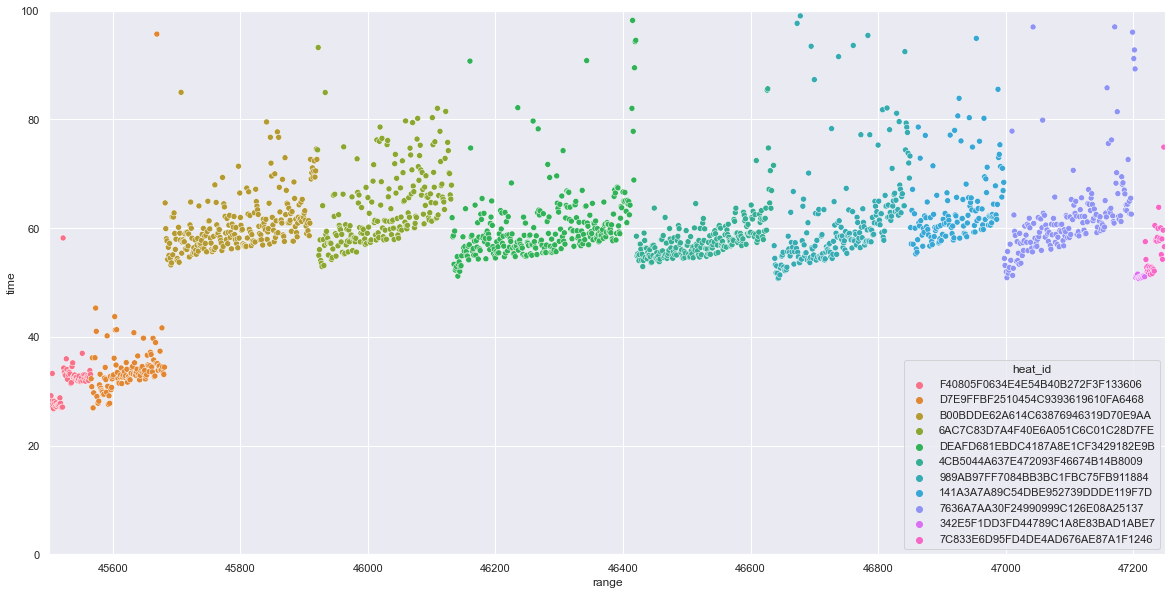

In [83]:
sns.scatterplot(
    data=df[
        (df["range"] > 45500)
        & (df["range"] < 47250)
    ],
    x="range",
    y="time",
    hue="heat_id"
)
plt.ylim(0, 100)
plt.xlim(45500, 47250)

plt.show()

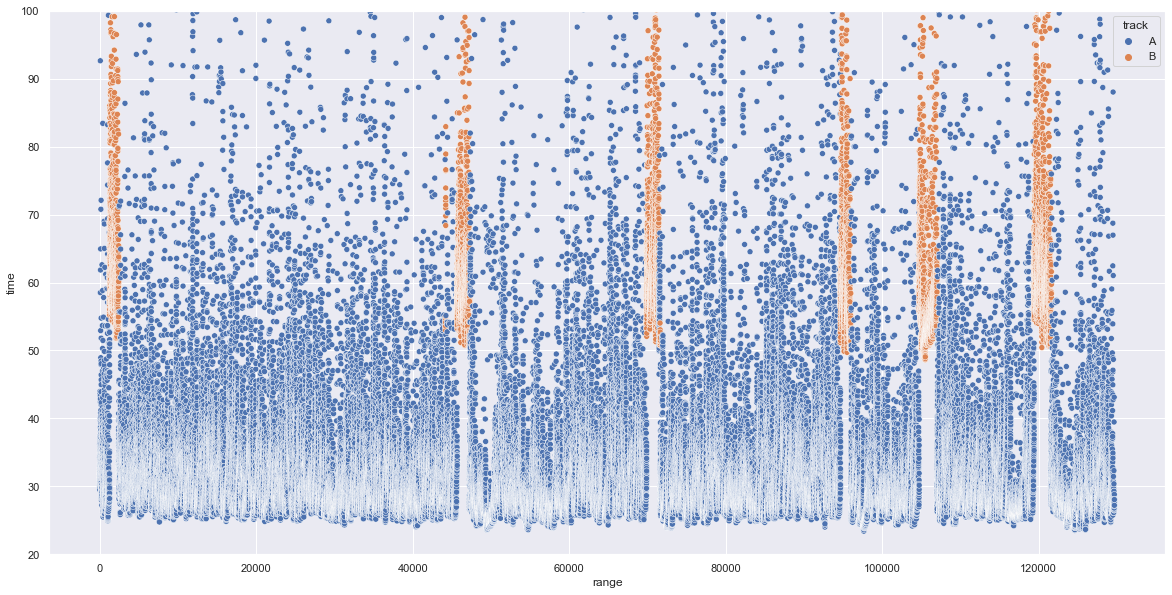

In [84]:
sns.scatterplot(
    data=df,
    x="range",
    y="time",
    hue="track"
)
plt.ylim(20, 100)
# plt.xlim(104000, 108000)

plt.show()

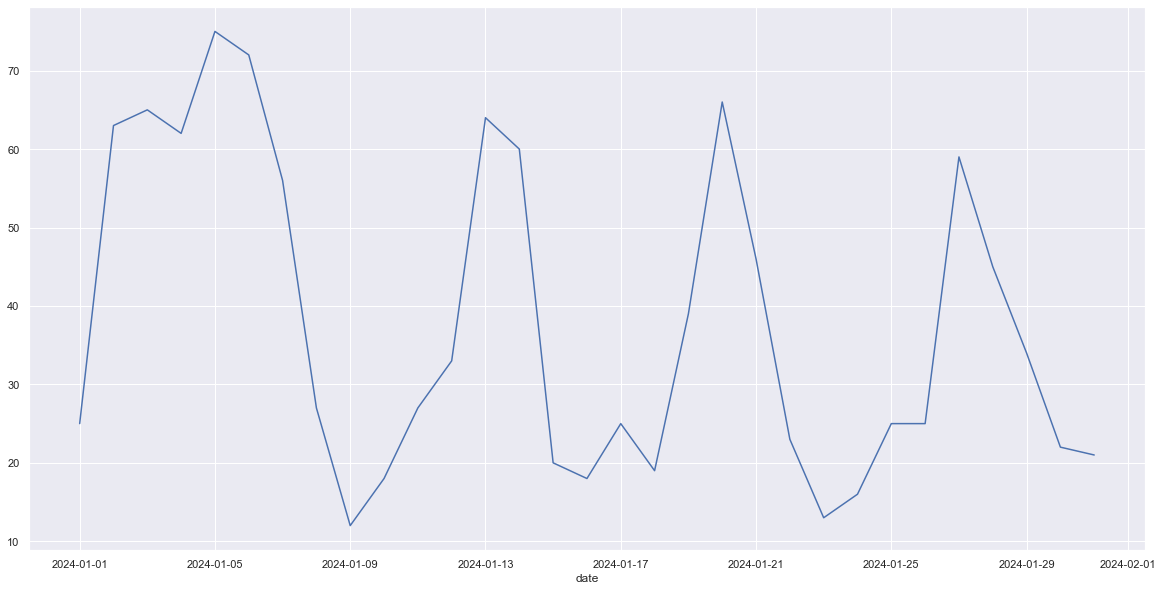

In [34]:
df.groupby("date")["heat_id"].nunique().plot();